## Exercise in Photogrammetry II
# Ex. 01 Relative Orientation
### Submission: xx.xx.xxxx 
### Points: 24

## A Fundamental matrix basics

In the lecture, you were introduced to the concept of the fundamental matrix. Complete the exercise below to strengthen your understanding.

**DATA:** Extract the data from the provided zip file with the password: photo

**Tasks:**

1.  You are given the position and orientation of two *ideal* cameras in world coordinate frame $(c=1)$. Position of camera $C_1$ is $X_0^1=[0,0,0]^T$ and of camera $C_2$ is $X_0^2=[2,5,0]^T$. The cameras viewing directions are along z-axis. The orientation of the $C_1$ and $C_2$ are provided as ```R_1``` and ```R_2```. Construct the fundamental matrix F_12. (2 Points)


In [1]:
import numpy as np 
%matplotlib notebook
R_1 = np.eye(3)
R_2 = np.array([[np.sqrt(0.5),-np.sqrt(0.5),0],[np.sqrt(0.5),np.sqrt(0.5),0],[0,0,1]])
X_1 = np.array([0, 0, 0])
X_2 = np.array([2, 5, 0])

print('R_1:',R_1)
print('R_2:',R_2)
print('X_1:',X_1)
print('X_2:',X_2)

R_1: [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
R_2: [[ 0.70710678 -0.70710678  0.        ]
 [ 0.70710678  0.70710678  0.        ]
 [ 0.          0.          1.        ]]
X_1: [0 0 0]
X_2: [2 5 0]


### Fundamental Matrix $F$ From the Camera Projection Matrices

$F = A'^{-T}S_{b'_{12}}A''^{-1}$

where

$A'$ and $A''$ - projection matrices for two given cameras,  

$A = KR$  
$K$ - calibration matrix of a given camera,  
$R$ - rotation matrix of a given camera,  

$S_{b'_{12}}$ - skew-symmetric matrix made out of vector $b$ going from the first camera to the second,  

$$S_b = \begin{bmatrix} 0 & -b_3 & b_2 \\ b_3 & 0 & -b_1 \\ -b_2 & b_1 & 0 \end{bmatrix}$$  

where

$b'_{12} = X_{O''}-X_{O'}$  
$X_{O'}$ and $X_{O''}$ - projection centers of the cameras

### Let's construct the most typical calibration matrix $K$ for *ideal* camera

$$K = \begin{bmatrix} f_x & s & c_x \\ 0 & f_y & c_y \\ 0 & 0 & 1 \end{bmatrix}$$ 
$$K = \begin{bmatrix} 1000 & 0 & 640 \\ 0 & 1000 & 360 \\ 0 & 0 & 1 \end{bmatrix}$$  

That would be a camera where:  

$f_x = f_y = 1000$ pixels (typical focal length)  
$c_x = 640$ pixels (assuming image width is 1280 pixels, principal point centered)  
$c_y = 360$ pixels (assuming image height is 720 pixels, principal point centered)  
$s = 0$ (assuming no skew)

In [2]:
K = np.array([[1000, 0, 640],
             [0, 1000, 360],
             [0, 0, 1]])
print(K)

[[1000    0  640]
 [   0 1000  360]
 [   0    0    1]]


### Find the projection matrices $A'$ and $A''$

In [3]:
A_p = K @ R_1
A_pp = K @ R_2

### Find $A'^{-T}$ and $A''^{-1}$

In [4]:
A_p_minT = np.transpose(np.linalg.inv(A_p))
A_pp_min = np.linalg.inv(A_pp)

### Find baseline vector $b'_{12}$

In [5]:
b_12 = X_2 - X_1

### Construct the skew-symmetric matrix $S_{b'_{12}}$

In [6]:
S_b12 = np.array([[0, -b_12[2], b_12[1]], [b_12[2], 0, -b_12[0]], [-b_12[1], b_12[0], 0]])

### Calculate the fundamental matrix $F$

In [7]:
F = A_p_minT @ S_b12 @ A_pp_min
print(F)

[[ 0.          0.          0.005     ]
 [ 0.          0.         -0.002     ]
 [-0.00494975 -0.00212132  1.4515137 ]]


### Confirm the correctness:

### 1. Rank should be 2

In [8]:
rank = np.linalg.matrix_rank(F)
print(rank)

2


### 2. Epipolar constraint $x'^TFx''$ should be close to zero

In [9]:
# We are given few correspondences points in data/correspondences.txt.
c_11 = np.array([8.870000000000000000e+02, 4.420000000000000000e+02, 1]).T
c_12 = np.array([9.059897739504848460e+02, 3.623945102260494764e+02, 1])

epipolar = c_11 @ F @ c_12
print(epipolar)

-0.25066173346203346


It doesn't seem close to zero, but maybe it's because I came up with arbitrary calibration that is probably different from the calibration of the camera that was used to find those correspondeces? Also noone said that the given translations are real translations used for the photoshoot.

### 3. Determinant should be close to zero

In [10]:
det = np.linalg.det(F)
print(det)

0.0


### 4. Symmetry $F + F^T$ should be close to zero 

In [11]:
symmetry = F + F.T
print(symmetry)

[[ 0.00000000e+00  0.00000000e+00  5.02525317e-05]
 [ 0.00000000e+00  0.00000000e+00 -4.12132034e-03]
 [ 5.02525317e-05 -4.12132034e-03  2.90302741e+00]]


### Let's try OpenCV

In [12]:
import cv2

c1 = np.array([[3.870000000000000000e+02, 5.530000000000000000e+02], [3.230000000000000000e+02, 2.740000000000000000e+02],
              [4.630000000000000000e+02, 2.380000000000000000e+02], [6.760000000000000000e+02, 4.930000000000000568e+02],
              [5.470000000000000000e+02, 1.710000000000000000e+02], [7.400000000000000000e+02, 5.160000000000000000e+02],
              [7.630000000000000000e+02, 4.760000000000000000e+02]])
c2 = np.array([[1.539999999999998010e+02, 4.689999999999998863e+02], [2.459999999999998010e+02, 2.689999999999998863e+02],
              [3.879999999999998863e+02, 2.169999999999998579e+02], [4.759999999999998295e+02, 4.169999999999998863e+02],
              [4.904892357373520326e+02, 1.445258342303551444e+02], [6.110489773950486097e+02, 4.377443487621097802e+02],
              [6.803708288482239368e+02, 4.045904198062432329e+02]])

F, mask = cv2.findFundamentalMat(c1, c2, cv2.FM_RANSAC)
rank = np.linalg.matrix_rank(F)
epipolar = c_11 @ F @ c_12
det = np.linalg.det(F)
symmetry = F + F.T

print(F)
print(rank)
print(epipolar)
print(det)
print(symmetry)

[[ 1.33978997e-06 -4.96733457e-06  1.04845799e-03]
 [ 9.01402658e-06 -1.68452455e-06 -6.17252080e-03]
 [-3.52726162e-03  4.05515313e-03  1.00000000e+00]]
2
0.29540314778438403
-6.637810809272559e-27
[[ 2.67957995e-06  4.04669201e-06 -2.47880363e-03]
 [ 4.04669201e-06 -3.36904911e-06 -2.11736767e-03]
 [-2.47880363e-03 -2.11736767e-03  2.00000000e+00]]


### The OpenCV algorithm for finding fundamental matrix is giving me similar epipolar offset from 0, and has similar symmetry values.

2. The bilinear form $x'^TFx'' = 0$ encodes the coplanarity constraint and can be simplified to a matrix multiplication using Kronecker product $\otimes$. Show that $x'^TFx'' = 0$, $F\in \mathbb{R}^{3\times3}$ is equivalent to $(x''\otimes x')^Tf$, where $f \in \mathbb{R}^{9\times1}$. You can either use markdown or plot an image of some handwritten notes for example. (4 Points)

## B Epipolar geometry

You are given a fundamental matrix $F_{12}$ between the images $I_1$ and $I_2$ originated from camera $C_1$ and $C_2$ respectively.

4. How to estimate fo a given point e'' in $I_2$ if it is the epipole of the camera $C_1$? (1 Point)
   - e'' in $I_2$ is the epipole of camera $C_1$ if it lies on the projection line from projection center $C_1$ to $C_2$
6. Similarly, how to check if e' is an epipole in $I_1$? (1 Point)
   - e' is an epipole in $I_1$ if it lies on the projection line from $C_2$ to $C_1$
8. Estimate the image coordinates of both epipoles e' and e''. (4 Points)
   - $e' = null(F^T)$
   - $e'' = null(F)$  
   so, all we have to do is to find the nullspaces of $F^T$ and $F$ and find the vectors corresponding to 0 singular values.



The fundamental matrix $F_{12}$ consists of the following values:

In [13]:
F_12 = np.array([[-2,-4,12],
                [6,-2,-8],
                [8,-4,-8]])

# Find e'.
U, S, V = np.linalg.svd(F_12.T)
nullspace_basis = V.T[:, np.isclose(S, 0)]
epipole_1 = nullspace_basis[:, 0]
epipole_1 /= epipole_1[2]

# Find e''.
U, S, V = np.linalg.svd(F_12)
nullspace_basis = V.T[:, np.isclose(S, 0)]
epipole_2 = nullspace_basis[:, 0]
epipole_2 /= epipole_2[2]

print(f'e1: {epipole_1}')
print(f'e2: {epipole_2}')

e1: [-0.28571429 -1.42857143  1.        ]
e2: [2. 2. 1.]


## C Seeing epipolar lines
In this exercise you will learn to visualize the epipolar lines.

7. Use the image point correspondences from the exercise A and the fundamental matrix to write a code that visualizes for every image point from image $I_1$ the corresponding epipolar lines on the image $I_2$. Plot also the correspondend points in $I_2$ (8 Points)

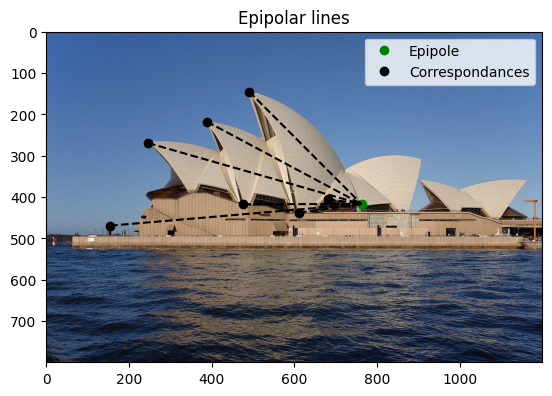

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# Find the epipole.
U, S, V = np.linalg.svd(F)
nullspace_basis = V.T[:, np.isclose(S, 0)]
e = nullspace_basis[:, 0]
e /= e[2]

img = mpimg.imread('data/sydney_opera_2.jpg')

plt.imshow(img)
plt.plot(e[0], e[1], 'go', label='Epipole')
plt.plot(c2[:, 0], c2[:, 1], 'ko', label='Correspondances')
for point in c2:
    plt.plot([point[0], e[0]], [point[1], e[1]], 'k--')
plt.title('Epipolar lines')
plt.legend()
plt.show()

## D Epipolar geometry for the normal case

In the lecture you were introduced to the epipolar geometry for the general case. In this exercise your task is to adapt the general formulation to the stereo normal case.

8. Draw the epipolar geometry with all the neccessary variables. You can draw it by hand or your prefered tools. (4 Points)



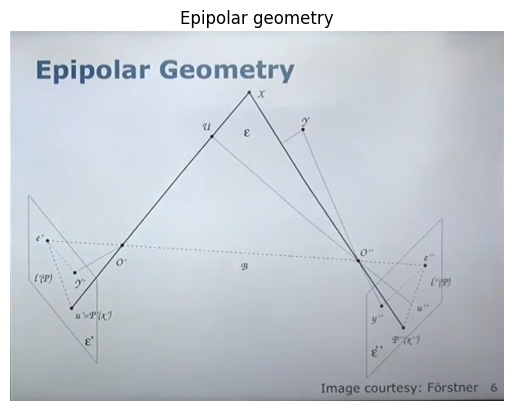

In [31]:
img = mpimg.imread('images/epipolar_geometry.png')
plt.imshow(img)
plt.title('Epipolar geometry')
plt.axis('off')
plt.show()